In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_excel('/Users/elena/Documents/Диплом/Data/Data_total.xlsx')

In [4]:
df_t = pd.read_excel('/Users/elena/Documents/Диплом/Data/av_temperature.xlsx')
df_t.index = list(range(1960, 2017))

In [5]:
country_id = df[['Country Name', 'Country Code']]
country_dict = country_id.set_index('Country Code').T.to_dict('list')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  


In [6]:
years = list(range(1960,2020))

In [7]:
set(df['Series Name'])

{'Agricultural methane emissions (% of total)',
 'Agricultural nitrous oxide emissions (% of total)',
 'Air transport, freight (million ton-km)',
 'Air transport, passengers carried',
 'Air transport, registered carrier departures worldwide',
 'Alternative and nuclear energy (% of total energy use)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from electricity and heat production, total (% of total fuel combustion)',
 'CO2 emissions from gaseous fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (% of total)',
 'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)',
 'CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)',
 'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)',
 'CO2 emissions from solid fuel consumption (% of total)',
 'CO2 emissions from transport (% of total fuel

In [8]:
df[df.columns[11:55]]

,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
1057,NaN,NaN,NaN,75.350985,75.967435,73.771468,72.792224,73.640345,76.084409,75.745390,...,60.910376,56.889444,53.989450,58.858328,57.400666,57.692575,58.084950,56.821004,NaN,NaN
1060,NaN,NaN,NaN,46.104492,47.139028,47.790530,49.132443,50.566439,50.026557,48.790878,...,45.075783,45.247171,44.539480,44.213450,44.488911,43.906230,43.700752,43.451594,NaN,NaN
1061,NaN,NaN,NaN,30.991212,31.047234,31.384222,31.822778,32.274931,32.669887,32.685709,...,43.532258,45.155901,45.914869,46.566410,47.959981,48.727079,48.970653,50.219272,NaN,NaN
1064,NaN,NaN,NaN,53.211630,51.505508,50.595159,49.832929,48.347887,47.572128,46.990109,...,38.432099,38.752915,39.417143,40.099572,40.477757,40.832989,41.149294,41.702530,NaN,NaN
1065,NaN,NaN,NaN,59.057345,59.824233,60.596544,60.640229,62.649285,63.897026,63.400627,...,67.065405,69.545838,70.034000,70.835136,71.409813,71.710824,71.841899,72.547049,NaN,NaN
1068,NaN,NaN,NaN,40.410161,38.746261,38.545945,38.685000,39.235065,38.929521,37.898703,...,41.825073,41.304660,41.790271,41.366789,43.087484,44.735981,46.047397,46.506755,NaN,NaN
1069,NaN,NaN,NaN,29.074980,30.059613,29.181020,29.659528,29.752519,29.450606,28.389879,...,12.114179,11.679472,11.113004,11.116546,10.322313,9.720384,8.905885,8.154880,NaN,NaN
1071,NaN,NaN,NaN,50.438569,51.984543,50.849094,54.451372,53.927654,54.489953,54.675996,...,57.053053,57.241976,57.789457,58.000411,56.863896,57.024011,56.153569,55.478917,NaN,NaN
1072,NaN,NaN,NaN,75.306392,75.240148,74.937664,74.130577,74.249737,73.919314,74.023388,...,63.279509,63.884584,64.284323,64.714259,64.786638,64.818624,64.585656,64.559717,NaN,NaN
1074,NaN,NaN,NaN,21.756057,21.880937,23.732110,23.777737,24.885740,23.502518,23.194954,...,32.218863,33.415002,35.834954,37.687189,38.764541,39.420953,39.657078,39.532231,NaN,NaN


In [9]:
df = df.replace('..', np.NaN)

In [10]:
years = list(df.columns[14:])

# Agricultural methane emissions (% of total)

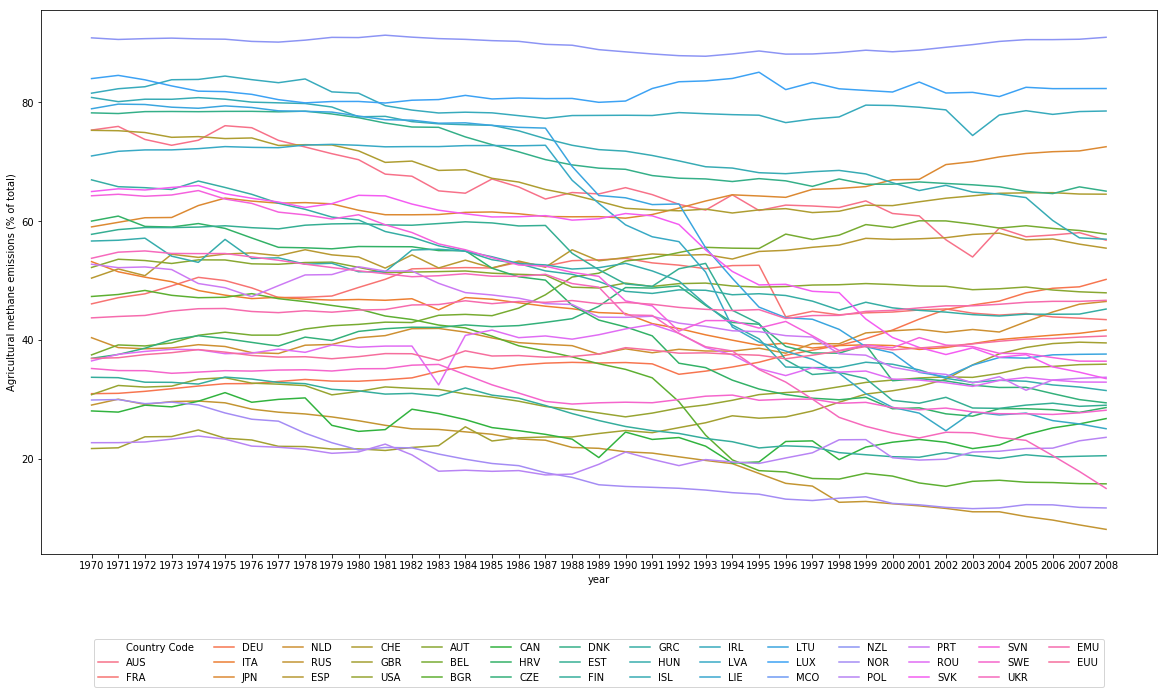

In [13]:
df1 = df[df['Series Name']=='Agricultural methane emissions (% of total)'].drop(columns=['Series Name', 'Series Code', 'Country Name']) 
df1 = df1.melt(id_vars=['Country Code'], value_vars=list(df1.columns[1:]))
df1.columns = ['Country Code', 'year', 'Agricultural methane emissions (% of total)']
df1 = df1[df1['year'].isin(years)]
plt.figure(figsize=(20,10))
g1 = sns.lineplot(x="year", y="Agricultural methane emissions (% of total)", hue="Country Code", data=df1)
g1.legend(loc='center', bbox_to_anchor=(0.5, -0.2), ncol=14)

# Agricultural nitrous oxide emissions (% of total)

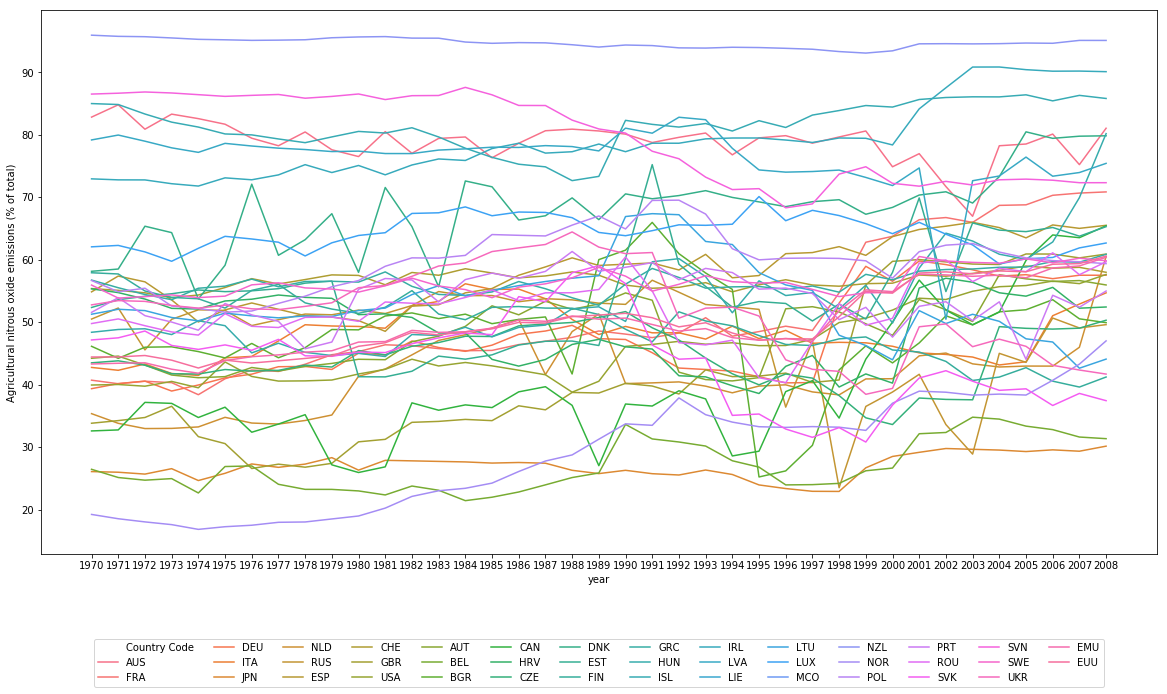

In [14]:
df1 = df[df['Series Name']=='Agricultural nitrous oxide emissions (% of total)'].drop(columns=['Series Name', 'Series Code', 'Country Name']) 
df1 = df1.melt(id_vars=['Country Code'], value_vars=list(df1.columns[1:]))
df1.columns = ['Country Code', 'year', 'Agricultural nitrous oxide emissions (% of total)']
df1 = df1[df1['year'].isin(years)]
plt.figure(figsize=(20,10))
g1 = sns.lineplot(x="year", y="Agricultural nitrous oxide emissions (% of total)", hue="Country Code", data=df1)
g1.legend(loc='center', bbox_to_anchor=(0.5, -0.2), ncol=14)

# Air transport, freight (million ton-km)

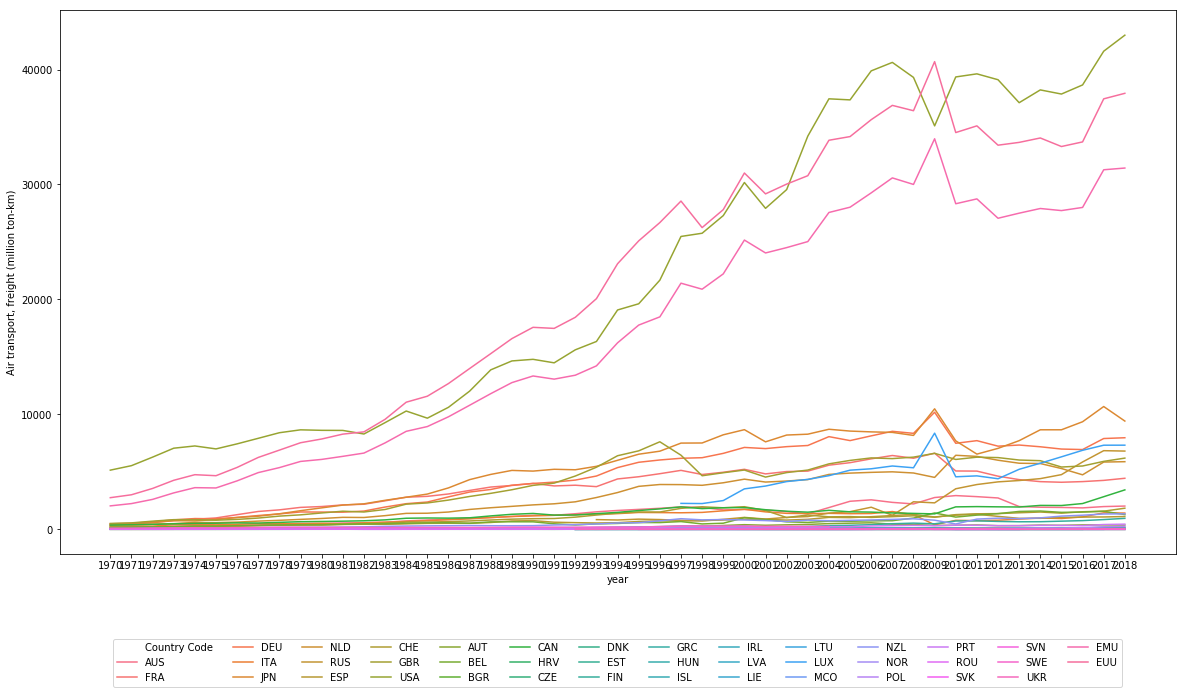

In [15]:
df1 = df[df['Series Name']=='Air transport, freight (million ton-km)'].drop(columns=['Series Name', 'Series Code', 'Country Name']) 
df1 = df1.melt(id_vars=['Country Code'], value_vars=list(df1.columns[1:]))
df1.columns = ['Country Code', 'year', 'Air transport, freight (million ton-km)']
df1 = df1[df1['year'].isin(years)]
plt.figure(figsize=(20,10))
g1 = sns.lineplot(x="year", y="Air transport, freight (million ton-km)", hue="Country Code", data=df1)
g1.legend(loc='center', bbox_to_anchor=(0.5, -0.2), ncol=14)